In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from sklearn.metrics import accuracy_score

In [2]:
# Set seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

data = []
labels = []
classes = 43
cur_path = os.getcwd()

In [3]:
# Retrieving the images and their labels 
for i in range(classes):
    path = os.path.join(cur_path, 'train', str(i))
    images = os.listdir(path)

    for a in images:
        try:
            image = Image.open(os.path.join(path, a))
            image = image.resize((30, 30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")


In [4]:
# Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)

print(data.shape, labels.shape)

(39209, 30, 30, 3) (39209,)


In [5]:
# Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [6]:
# Converting the labels into one-hot encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

In [7]:
# Building the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

In [8]:
# Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 20
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/20
981/981 [==============================] - 81s 82ms/step - loss: 2.0592 - accuracy: 0.4731 - val_loss: 0.7169 - val_accuracy: 0.8187
Epoch 2/20
981/981 [==============================] - 83s 84ms/step - loss: 0.9794 - accuracy: 0.7121 - val_loss: 0.4122 - val_accuracy: 0.8638
Epoch 3/20
981/981 [==============================] - 246s 251ms/step - loss: 0.7151 - accuracy: 0.7838 - val_loss: 0.2989 - val_accuracy: 0.9181
Epoch 4/20
981/981 [==============================] - 63s 65ms/step - loss: 0.5359 - accuracy: 0.8386 - val_loss: 0.1605 - val_accuracy: 0.9558
Epoch 5/20
981/981 [==============================] - 79s 81ms/step - loss: 0.4417 - accuracy: 0.8697 - val_loss: 0.2161 - val_accuracy: 0.9351
Epoch 6/20
981/981 [==============================] - 142s 144ms/step - loss: 0.3777 - accuracy: 0.8884 - val_loss: 0.1266 - val_accuracy: 0.9633
Epoch 7/20
981/981 [==============================] - 69s 70ms/step - loss: 0.3309 - accuracy: 0.9011 - val_loss: 0.1091 - val_accur

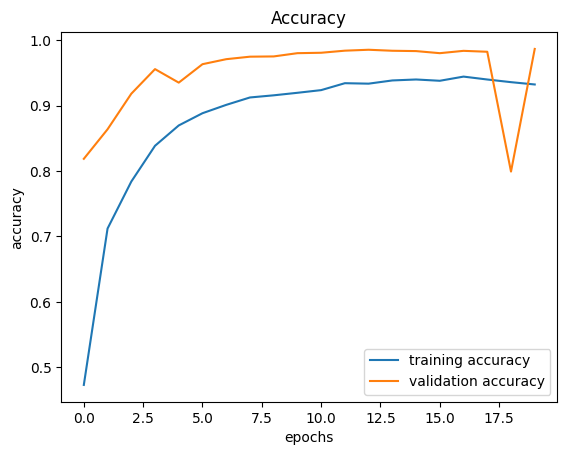

In [12]:
# Plotting graphs for accuracy 
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

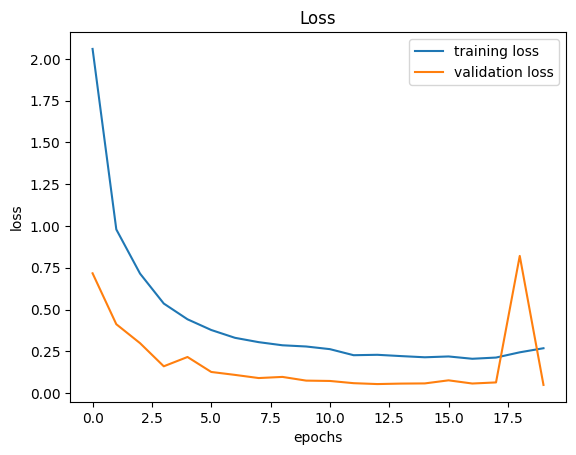

In [10]:
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [11]:
# Testing accuracy on test dataset
y_test_data = pd.read_csv('Test.csv')

labels = y_test_data["ClassId"].values
imgs = y_test_data["Path"].values

data = []

for img in imgs:
    image = Image.open(img)
    image = image.resize((30, 30))
    data.append(np.array(image))

X_test_data = np.array(data)

pred_probabilities = model.predict(X_test_data)
pred = np.argmax(pred_probabilities, axis=1)

# Accuracy with the test data
accuracy = accuracy_score(labels, pred)
print(f"Accuracy: {accuracy}")

# Save the model
model.save('traffic_classifier.h5')
print("Model saved successfully.")


395/395 [==============================] - 9s 23ms/step
Accuracy: 0.9475851148060174
Model saved successfully.
